In [1]:
!pip install pandas sklearn matplotlib seaborn sklearn --quiet
!pip install jovian

In [57]:
import pandas as pd
import numpy as np
import jovian
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('stud.csv')

## data checks to perform

1. check for missing 
2. check for duplicate 
3. check datatype
4. check the unique values from the column
5. check statistics of the data
6. chech the various catagories of the data

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
x = df.columns.to_list()
print(x)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


chech how many values are missing per column

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

what is the missing percentage 

In [9]:
missing_perc = (df.isna().sum()*100)/len(df)
missing_df = pd.DataFrame({'columns':df.columns,'missing_percent':missing_perc})
missing_df

,columns,missing_percent
gender,gender,0.0
race_ethnicity,race_ethnicity,0.0
parental_level_of_education,parental_level_of_education,0.0
lunch,lunch,0.0
test_preparation_course,test_preparation_course,0.0
math_score,math_score,0.0
reading_score,reading_score,0.0
writing_score,writing_score,0.0


In [10]:
# checking for the duplicated rows
df.duplicated().sum()

0

checking unique values for catagorical data and their value count 

In [11]:
for i in x:
    if df[i].dtype != 'int64':
        print(df[i].value_counts())
        print('**************************')


female    518
male      482
Name: gender, dtype: int64
**************************
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
**************************
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
**************************
standard        645
free/reduced    355
Name: lunch, dtype: int64
**************************
none         642
completed    358
Name: test_preparation_course, dtype: int64
**************************


#### creating num_col and cat_col

In [12]:
num_col = [i for i in x if df[i].dtype != 'O']
cat_col = [i for i in x if df[i].dtype == 'O']

Cheching whether marks are greater than 100 or less than 0, because thats impossible

In [13]:
for i in num_col:
        print(f'min value from {i} column is {df[i].min()} and max value is {df[i].max()}')

min value from math_score column is 0 and max value is 100
min value from reading_score column is 17 and max value is 100
min value from writing_score column is 10 and max value is 100


checking unique values for catagorical data

In [14]:

for i in cat_col:
    if df[i].dtype != 'int64':
        print(f'catagory in {i} are', df[i].unique(), end = '\n')
        

catagory in gender are ['female' 'male']
catagory in race_ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
catagory in parental_level_of_education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagory in lunch are ['standard' 'free/reduced']
catagory in test_preparation_course are ['none' 'completed']


In [15]:
df[num_col].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


stats of the num column

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### adding columns for total score and the average score

In [17]:
df['total'] = sum([df[i] for i in num_col])
df['average'] = sum([df[i] for i in num_col]) // len(num_col)


In [18]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94
996,male,group C,high school,free/reduced,none,62,55,55,172,57
997,female,group C,high school,free/reduced,completed,59,71,65,195,65
998,female,group D,some college,standard,completed,68,78,77,223,74


In [19]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   total                        1000 non-null   int64 
 9   average                      1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


# data visualization

<Axes: xlabel='total', ylabel='Count'>

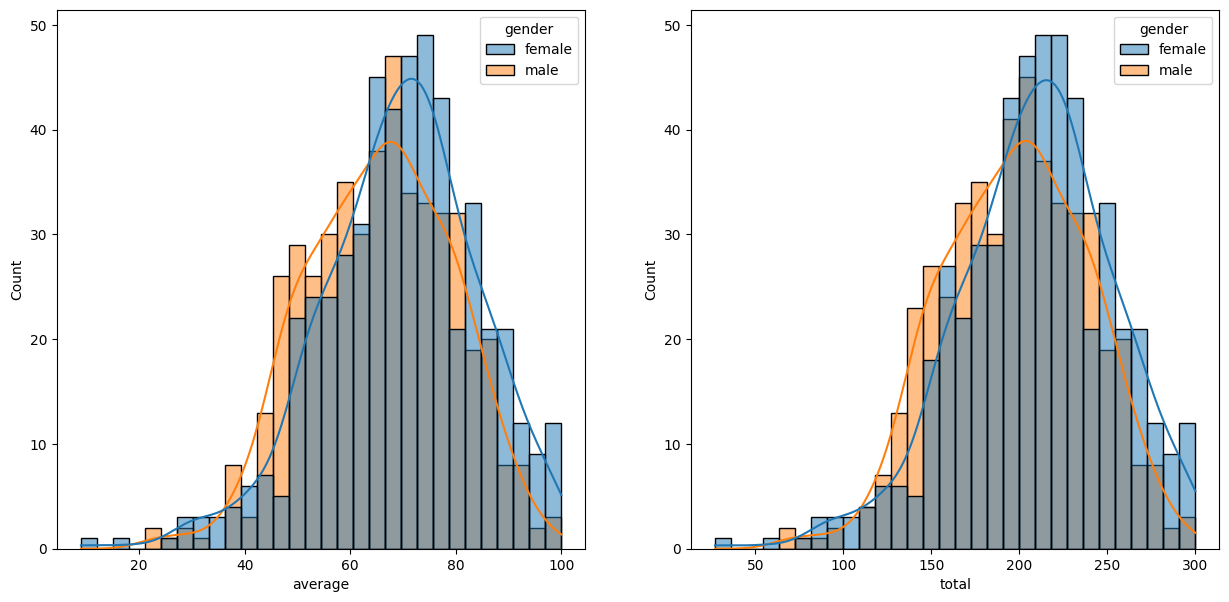

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
hist = sns.histplot(data = df, x = 'total', bins = 30, kde=True, color = 'g', hue= 'gender')
plt.subplot(121)
hist = sns.histplot(data = df, x = 'average', bins = 30, kde= True, color = 'g', hue= 'gender')
plt.subplot(122)

C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\3846072665.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\3846072665.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\3846072665.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


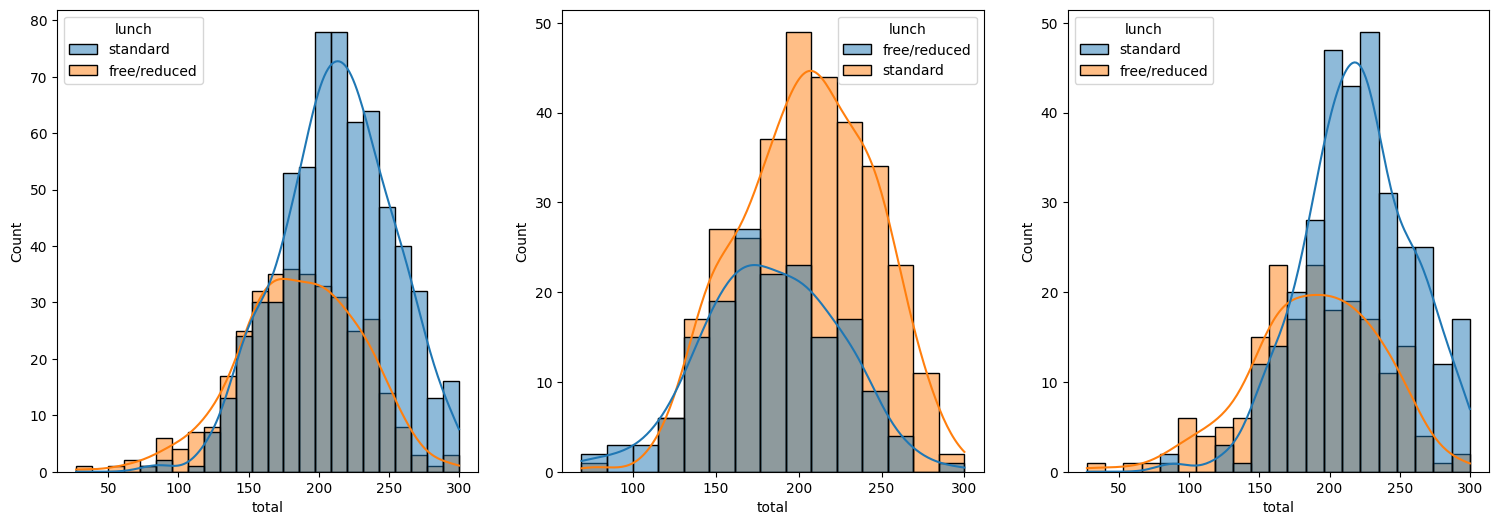

In [38]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'total', kde = True, color = 'g', hue ='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'male'], x = 'total',kde = True, color = 'g', hue ='lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'female'], x = 'total', kde = True, color = 'g', hue = 'lunch')
plt.show()


C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\3420049479.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\3420049479.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\3420049479.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


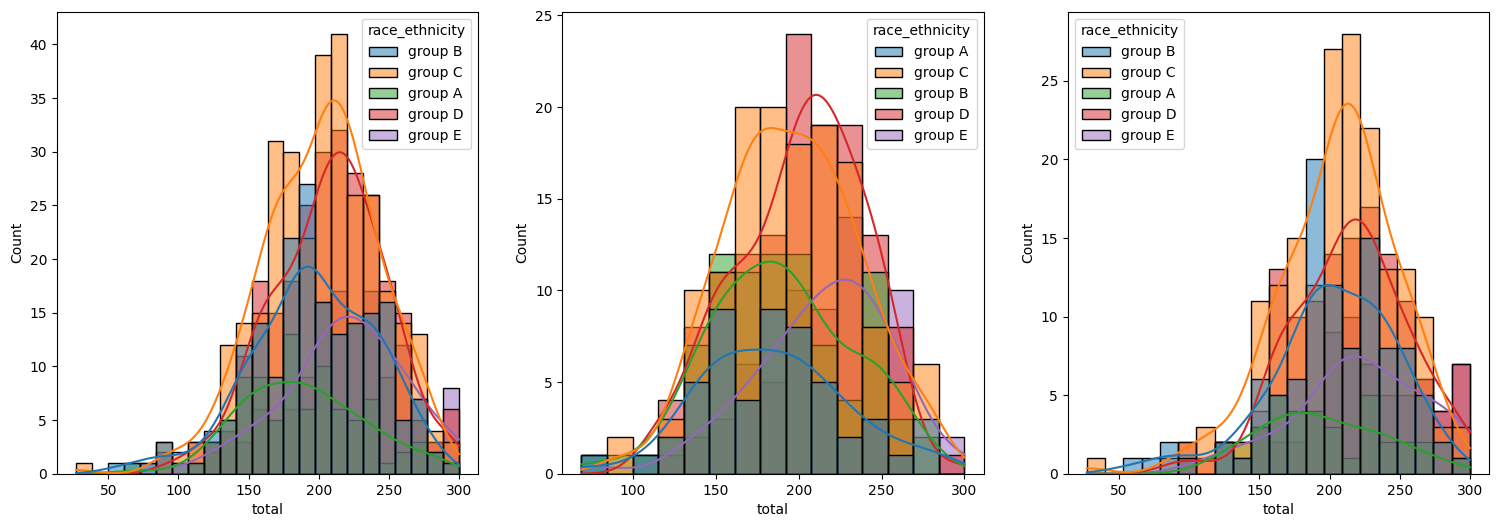

In [41]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'total', kde = True, hue ='race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'male'], x = 'total',kde = True, hue ='race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'female'], x = 'total', kde = True, hue = 'race_ethnicity')
plt.show()

C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\1611140826.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\1611140826.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\1611140826.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


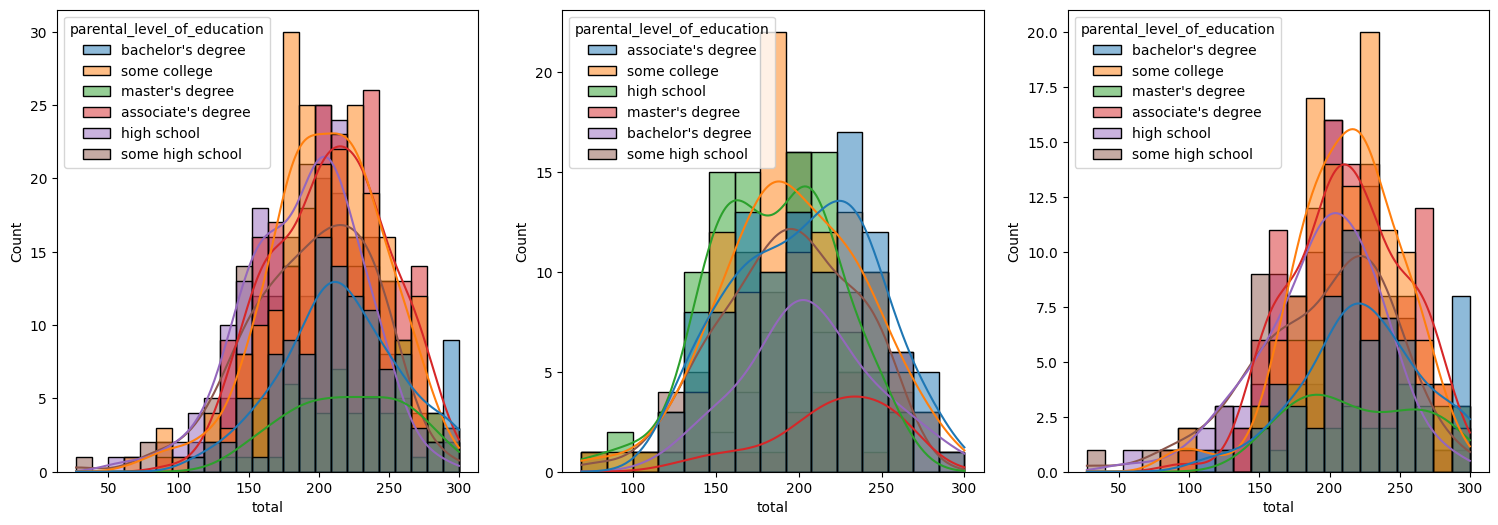

In [44]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'total', kde = True, hue ='parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'male'], x = 'total',kde = True, hue ='parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'female'], x = 'total', kde = True, hue = 'parental_level_of_education')
plt.show()

C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\2222046921.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\2222046921.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\2222046921.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


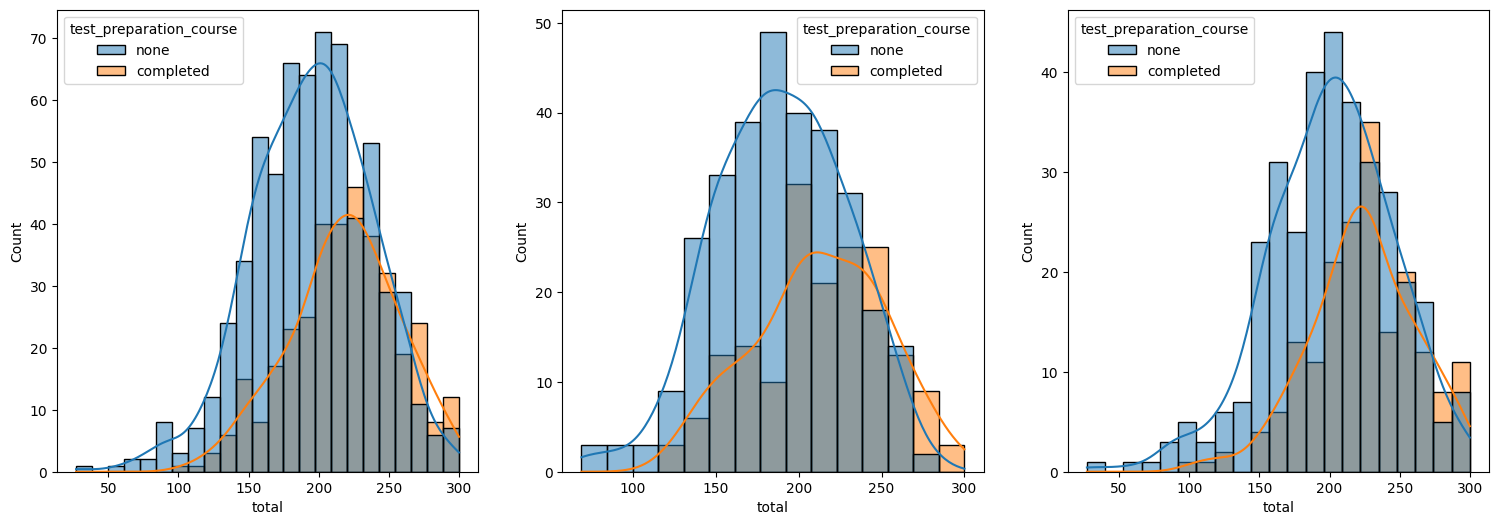

In [45]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'total', kde = True, hue ='test_preparation_course')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'male'], x = 'total',kde = True, hue ='test_preparation_course')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'female'], x = 'total', kde = True, hue = 'test_preparation_course')
plt.show()         

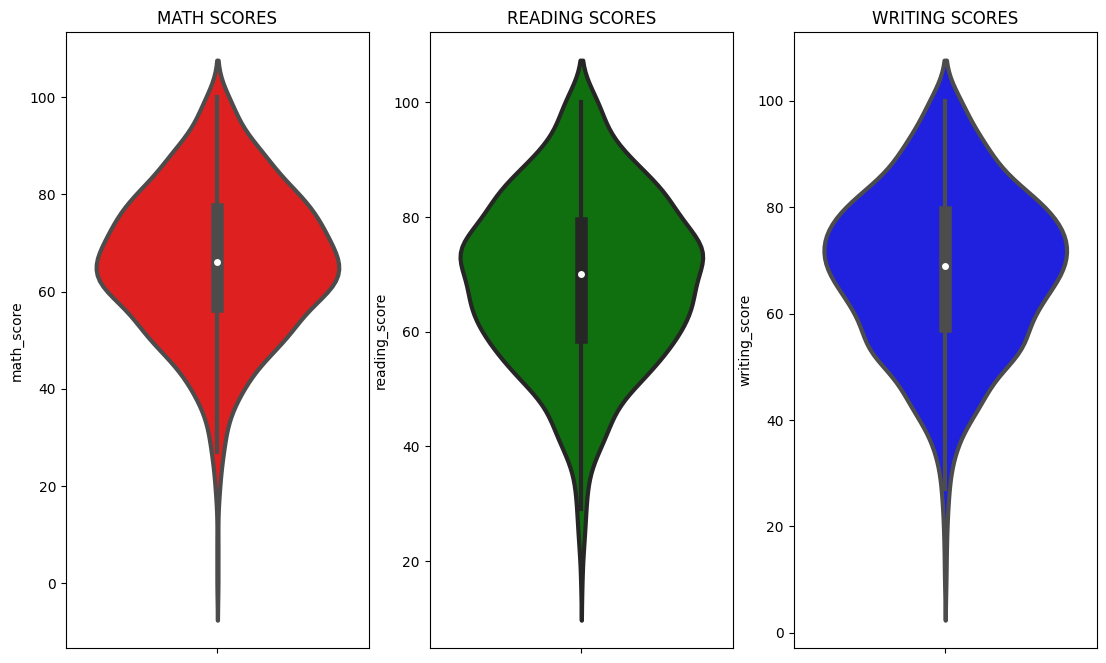

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

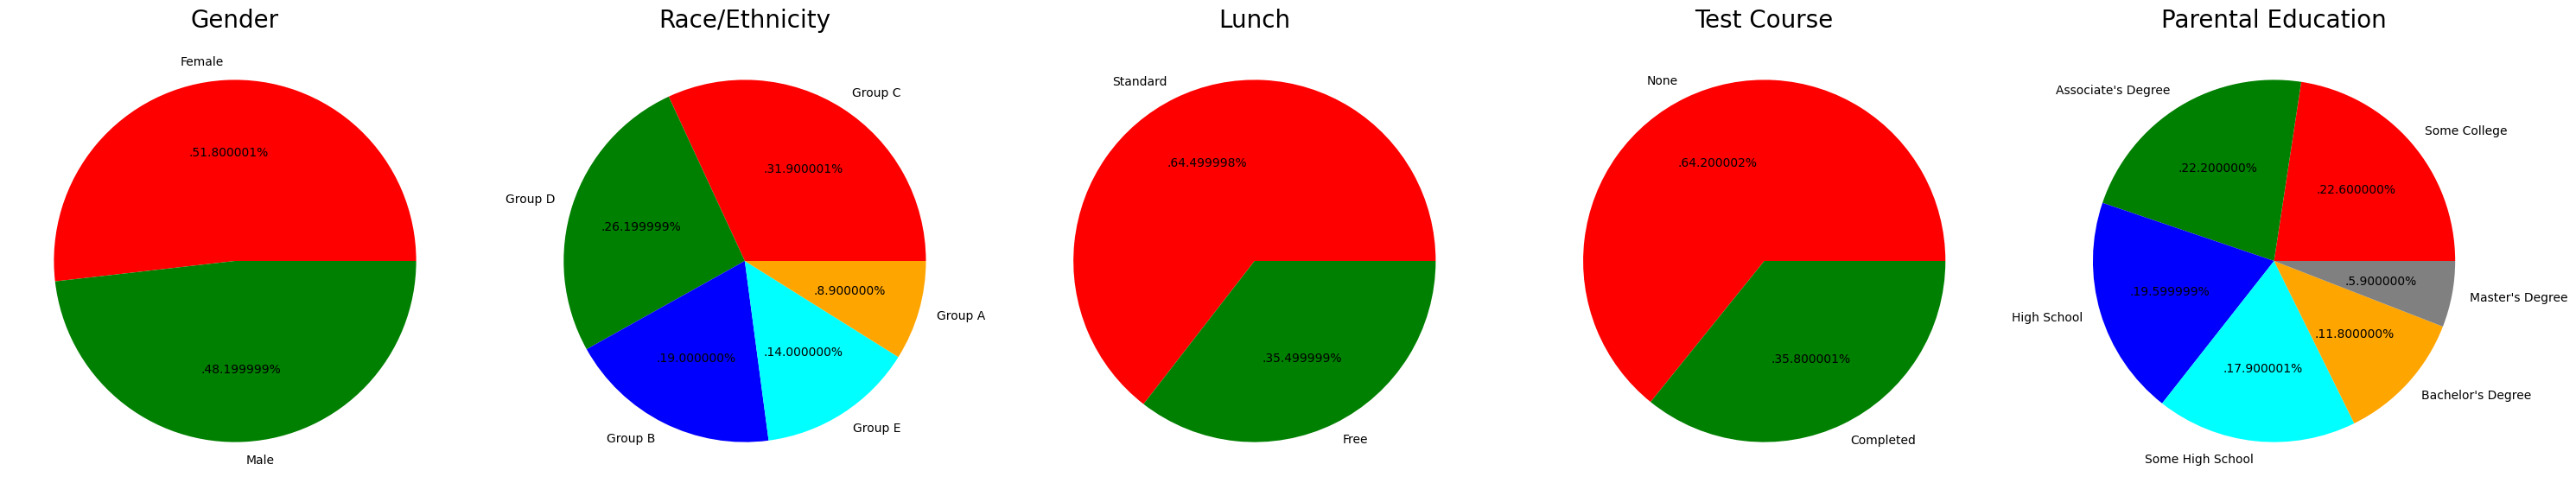

In [54]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

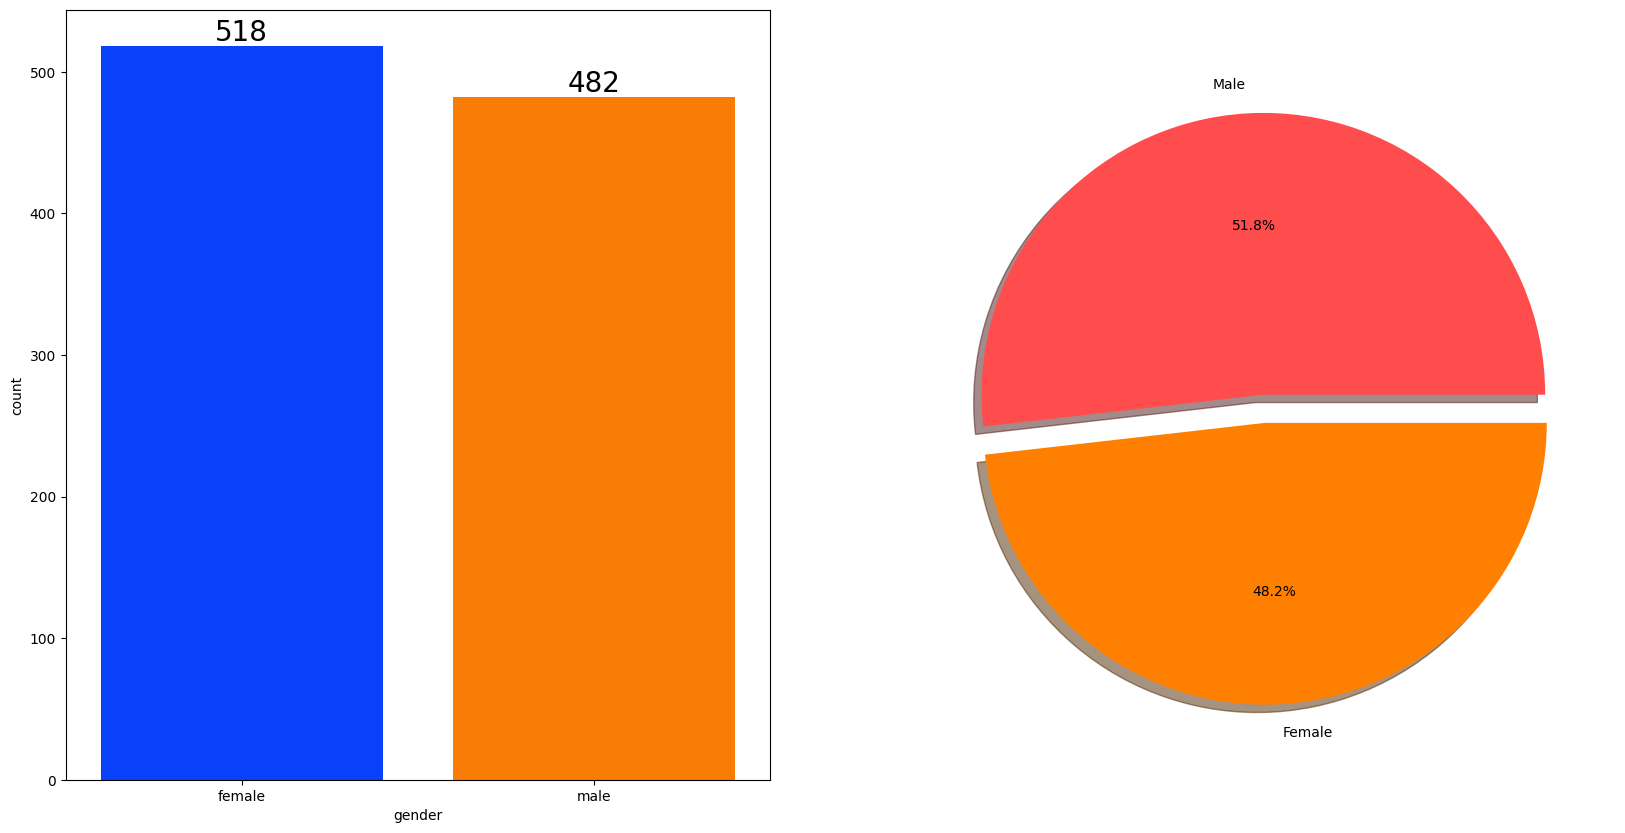

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

C:\Users\rkuka\AppData\Local\Temp\ipykernel_10960\2008418691.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


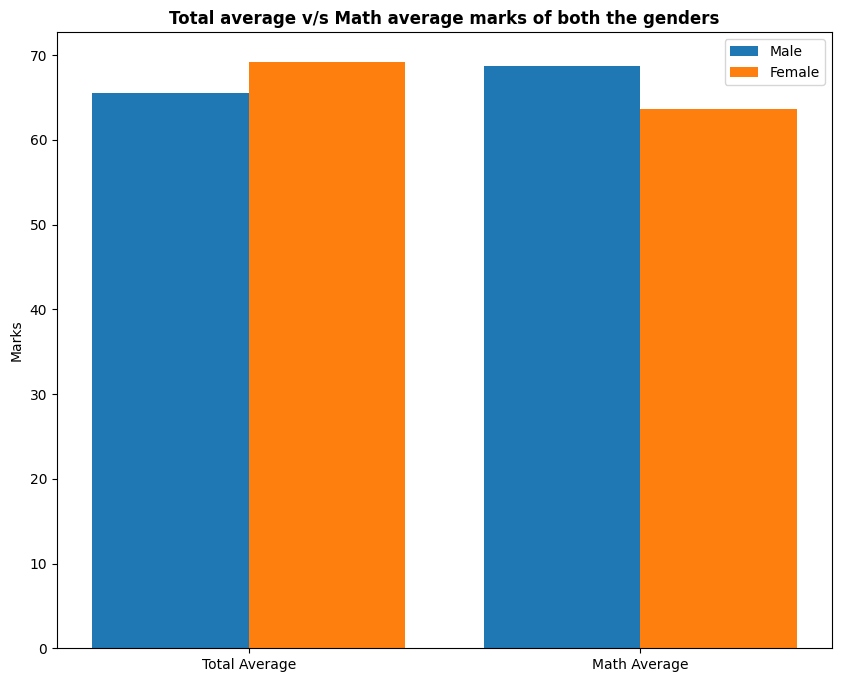

In [58]:
gender_group = df.groupby('gender').mean()
gender_group
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

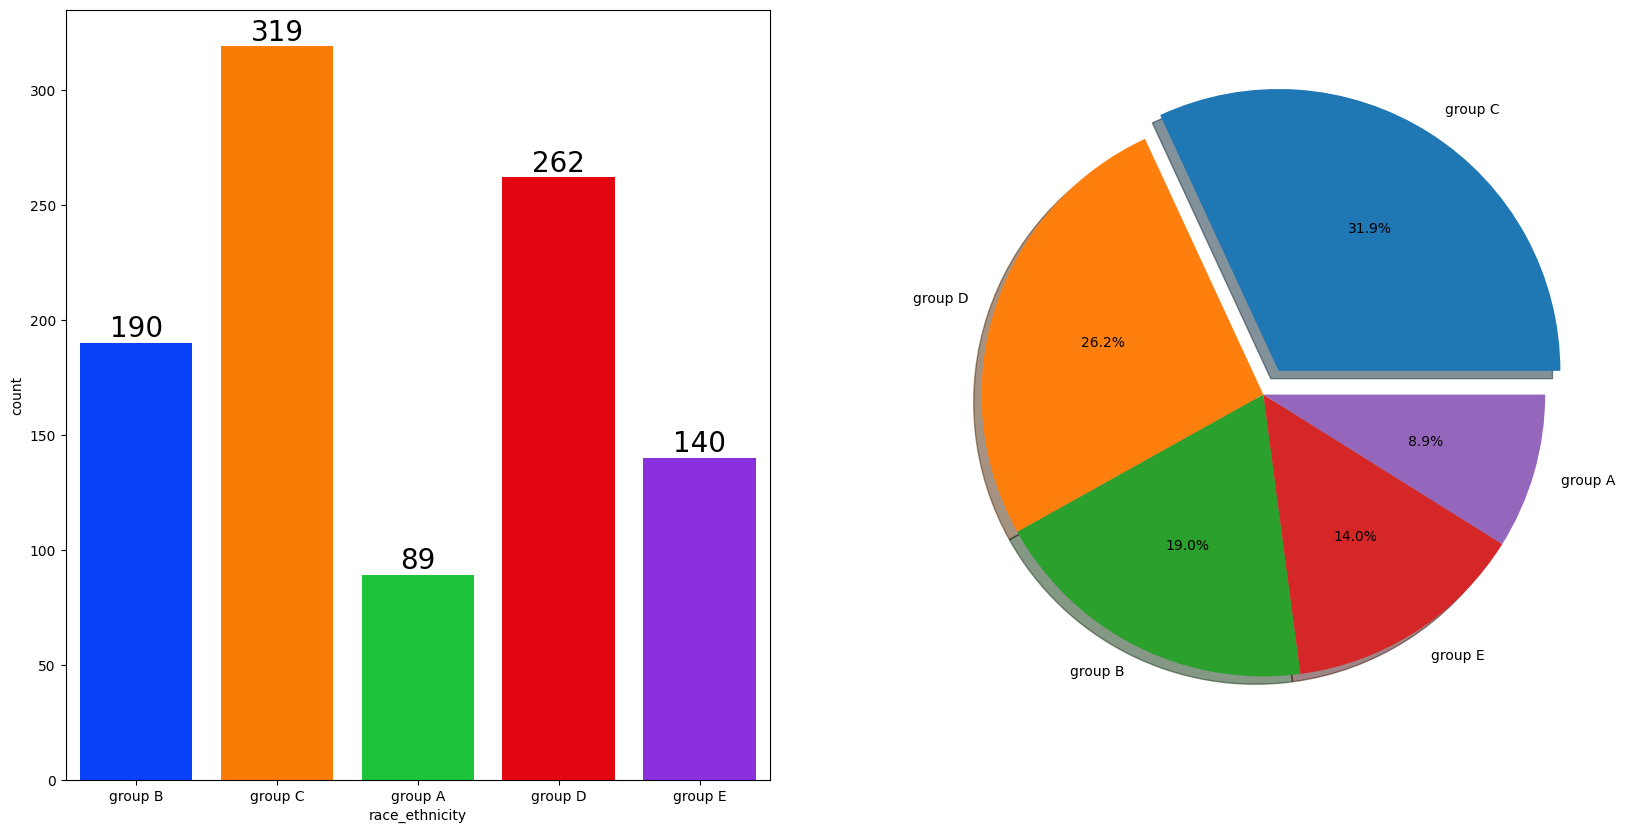

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

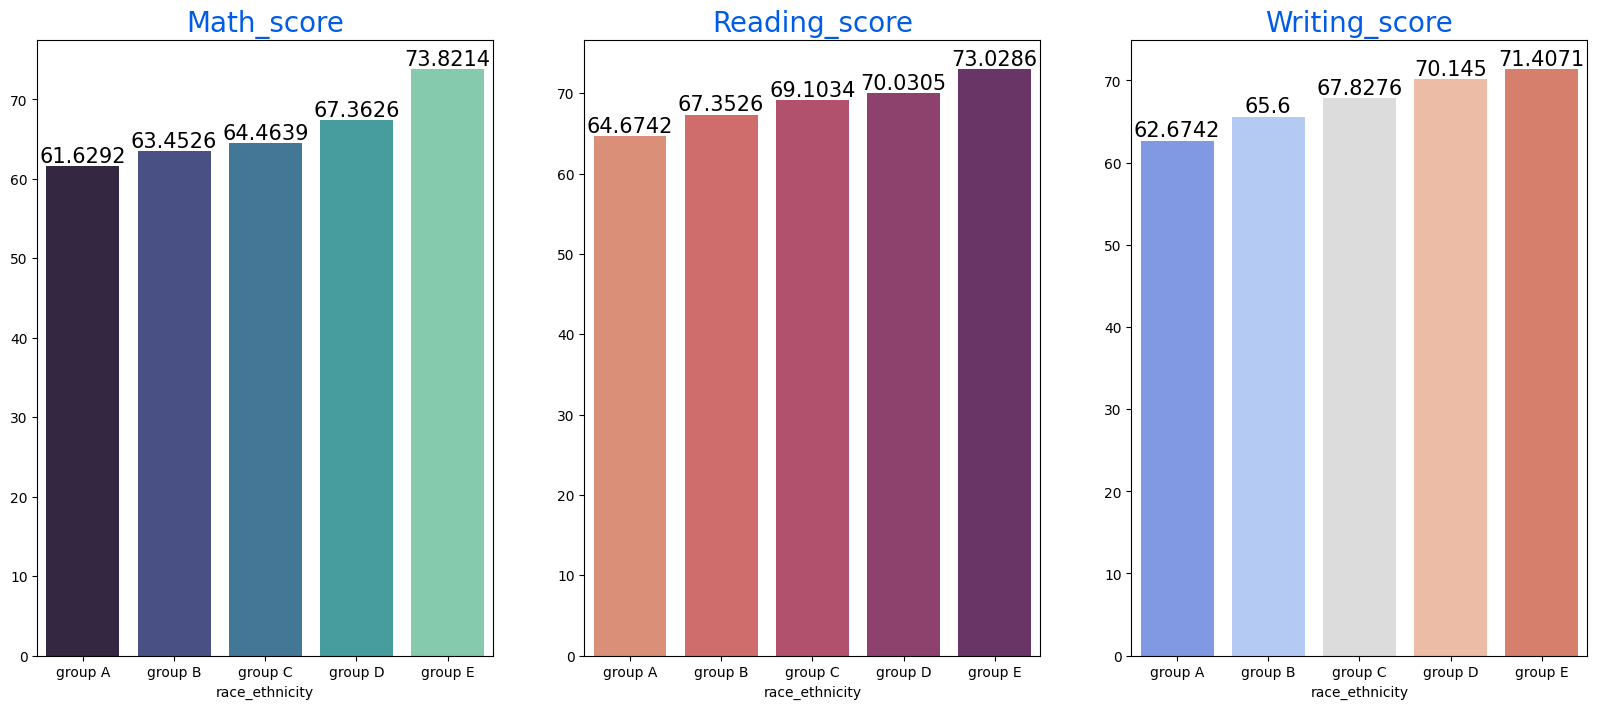

In [64]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

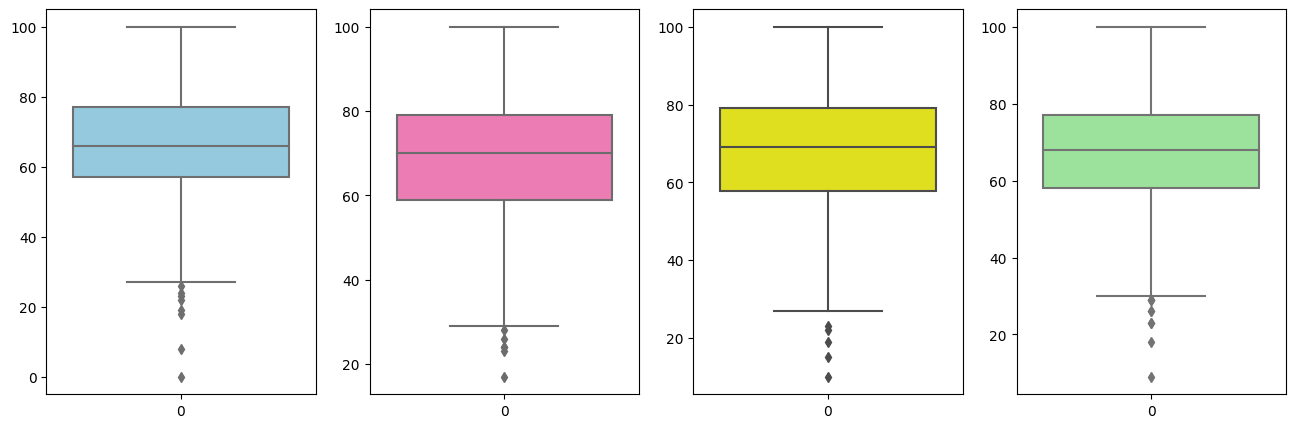

In [66]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>